[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


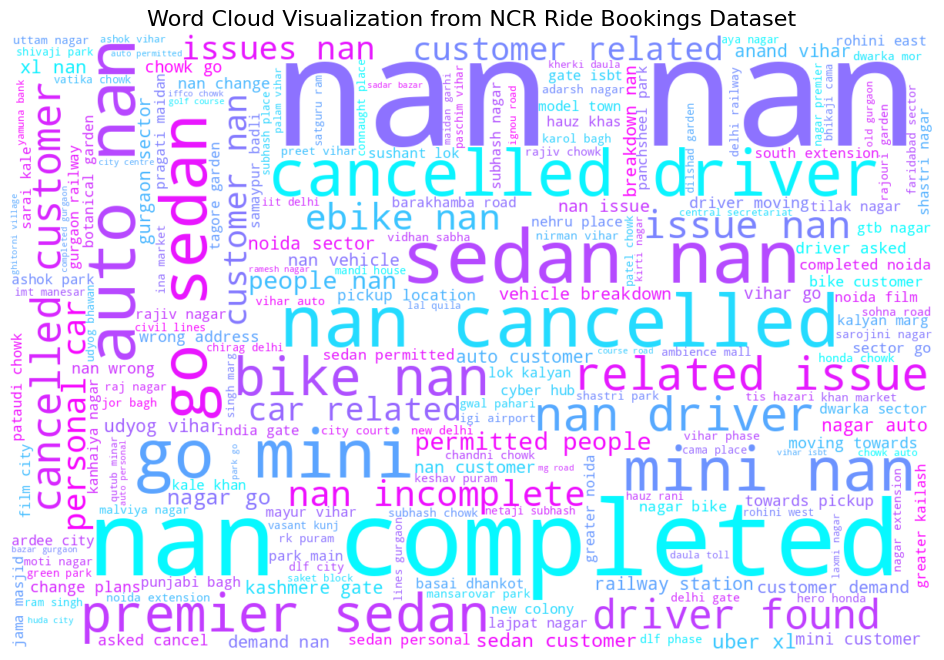

In [2]:
# Install required packages
# !pip install pandas matplotlib wordcloud nltk

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource

# Load your dataset
file_path = "/content/ncr_ride_bookings.csv"  # Make sure it's in the same folder
data = pd.read_csv(file_path)

# Select text columns for analysis
text_columns = [
    'Booking Status',
    'Pickup Location',
    'Drop Location',
    'Vehicle Type',
    'Driver Cancellation Reason',
    'Incomplete Rides Reason',
    'Reason for cancelling by Customer'
]

# Combine all text columns into a single text corpus
text_data = data[text_columns].astype(str).apply(lambda x: ' '.join(x), axis=1).str.cat(sep=' ')

# Convert text to lowercase
text_data = text_data.lower()

# Tokenize and clean
tokens = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Create Word Cloud
filtered_text = ' '.join(tokens)
wordcloud = WordCloud(width=1200, height=800, background_color='white', colormap='cool').generate(filtered_text)

# Plot the Word Cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Visualization from NCR Ride Bookings Dataset", fontsize=16)
plt.show()